<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/SIFT_Descriptor_for_Scale_Invariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To compute SIFT descriptors with scale invariance, we can leverage the inherent scale-space pyramid in SIFT. The SIFT algorithm is designed to detect keypoints and compute descriptors that are invariant to scale changes. Below is Python code to compute SIFT descriptors for keypoints and demonstrate their scale invariance.

1. Import Libraries

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Load the base image

In [8]:
image_path = "/Girl_with_a_Pearl_Earring.jpg"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # SIFT works with grayscale images

3. Create a scaled version of the image

In [9]:
scale_factor = 1.5
scaled_img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

4. Initialize the SIFT detector

In [10]:
sift = cv2.SIFT_create()

5. Detect keypoints and compute descriptors for both images

In [11]:
keypoints1, descriptors1 = sift.detectAndCompute(img, None)
keypoints2, descriptors2 = sift.detectAndCompute(scaled_img, None)

6. Visualize the keypoints for the original and scaled images

In [12]:
img_with_keypoints1 = cv2.drawKeypoints(
    img, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 255, 0)
)
img_with_keypoints2 = cv2.drawKeypoints(
    scaled_img, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, color=(0, 255, 0)
)

7. Display the keypoints

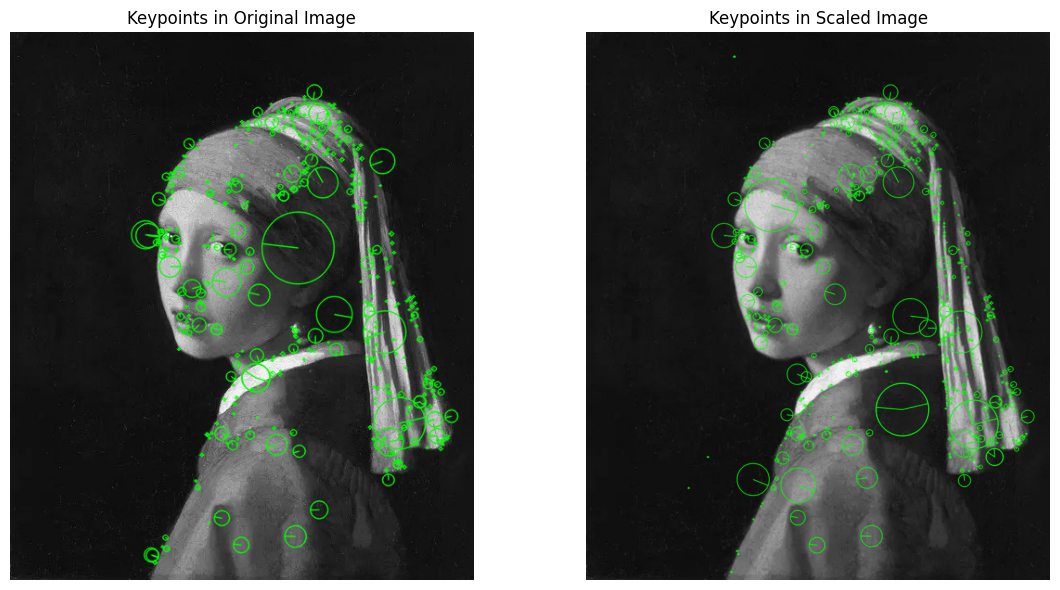

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_with_keypoints1, cmap="gray")
plt.title("Keypoints in Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_with_keypoints2, cmap="gray")
plt.title("Keypoints in Scaled Image")
plt.axis("off")
plt.tight_layout()
plt.show()

8. Match descriptors using BFMatcher

In [14]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

9. Sort matches by distance

In [15]:
matches = sorted(matches, key=lambda x: x.distance)

10. Draw matches between the two images

In [16]:
match_img = cv2.drawMatches(
    img, keypoints1, scaled_img, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

11. Display matches

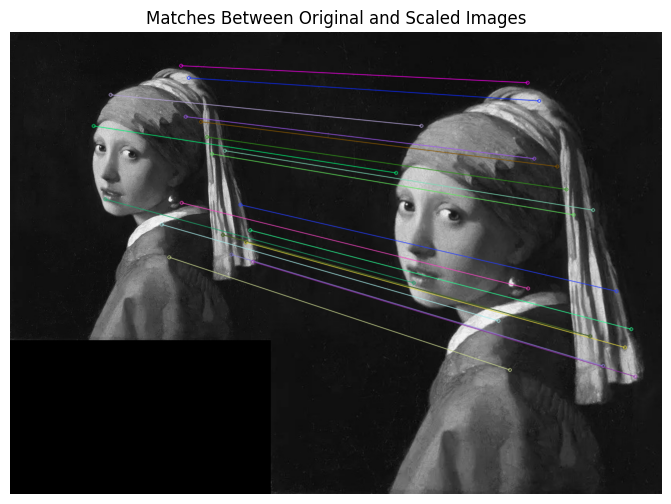

In [17]:
plt.figure(figsize=(12, 6))
plt.imshow(match_img)
plt.title("Matches Between Original and Scaled Images")
plt.axis("off")
plt.show()